In [7]:
import time
import csv
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import re

# Functions

In [8]:
def create_word_frequency_dataframe(df):
    word_count = Counter()

    # Assuming the sentence is in the 'sentence' column
    for sentence in df['query']:
        words = sentence.split()  # Tokenize the sentence into words
        word_count.update(words)  # Update the word count dictionary

    # Create a DataFrame with columns "words" and "frequency"
    word_frequencies = pd.DataFrame({'words': list(word_count.keys()), 'frequency': list(word_count.values())})
    
    # Sort the DataFrame by frequency in descending order
    word_frequencies = word_frequencies.sort_values(by='frequency', ascending=False)

    return word_frequencies

In [9]:
def create_word_count_column(df_query, df_categ):
    # Combine the words in word_frequencies_df["words"] into a regex pattern
    pattern = '|'.join(map(re.escape, df_categ["words"]))

    # Define a function to count the words in a given string
    def count_words(row):
        return sum(1 for word in re.findall(pattern, row, flags=re.IGNORECASE))

    # Add a new column "category_count" to df_query
    df_query["category_count"] = df_query["query"].apply(count_words)

# Import data (csv files) and show pd data frames

In [10]:
# Import the csv files 

# Big query df
df_query = pd.read_csv("query_all_col_with_col_names_11_10_23.csv")

# Category df
df_categ  = pd.read_csv("categories.csv",  names=["words"])

# Search words df (mostly not in category but good to find porn content)
df_search_words = pd.read_csv("search_words.csv",  names=["search_words", "number of queries"])

In [13]:
# If you have a new csv from DataGrip uncommen this and add the columns of the tables: Query, TimeDim, Facts

#csv_file_path = "query_maybe_with_p_content.csv"
#df_query = pd.read_csv(csv_file_path,  names=["query", "QueryID", "year", "month", "calender week", "day of the week", "weekday", "day of the month", "day of the year", "hour", "minute", "second", "QUERYID", "TIMEID", "ANONID", "URLID", "IRANK", "CLICK"])
#df_query.to_csv('query_all_col_with_col_names_11_10_23.csv', index=False)

In [14]:
df_query

,query,QueryID,year,month,calender week,day of the week,weekday,day of the month,day of the year,hour,minute,second,QUERYID,TIMEID,ANONID,URLID,IRANK,CLICK
0,gay raw sex,4833334,2006,may,21,2,tuesday,23,143,9,2,16,4271759,4833334,129785,1232550,4.0,True
1,the better sex workout,117764,2006,april,14,2,tuesday,4,94,0,12,45,9786007,117764,628673,368418,NaN,False
2,lindsay lohan nude,5926048,2006,march,12,4,thursday,23,82,1,12,29,4771261,5926048,423941,1355158,1.0,True
3,naked girls,5432719,2006,march,9,7,sunday,5,64,22,56,22,1010647,5432719,423646,1355158,4.0,True
4,bare naked ladies,4254011,2006,may,18,7,sunday,7,127,17,57,50,597368,4254011,235338,368418,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171179,www wamsexyorgy.com,6094315,2006,march,10,4,thursday,9,68,10,15,38,1529519,6094315,333081,368418,NaN,False
1171180,zodiac girlz,3507166,2006,may,21,6,saturday,27,147,19,6,33,6442548,3507166,342319,516451,2.0,True
1171181,dog sex,3148924,2006,march,11,3,wednesday,15,74,0,51,13,3478249,3148924,19693,1192529,15.0,True
1171182,free interracial sex stories,5809538,2006,april,17,3,wednesday,26,116,8,37,22,5735749,5809538,200177,1390954,4.0,True


In [15]:
df_categ

,words
0,amateur
1,3D
2,4K
3,amateur
4,anal
...,...
135,tits
136,toy
137,transgender
138,vintage


In [16]:
df_search_words

,search_words,number of queries
0,xxx,10320
1,porn,25100
2,sex,68479
3,fuck,14452
4,girl,53140
5,babe,4840
6,teen,30617
7,cum,14151
8,adult,14937
9,18,20167


In [17]:
sum(df_search_words["number of queries"]) # More hits with or, or, or than the sum of single queries ??? Any idea why? :)

315993

# Columns of the data base

### TIMEDIM
ID
year
month
calender week
day of the week
weekday
day of the month
day of the year
hour
minute
second

### FACTS
QUERYID
TIMEID
ANONID
URLID
IRANK
CLICK

# Data analysis

### Count words in queries. Look for most frequent words

In [18]:
df_word_frequencies = create_word_frequency_dataframe(df_query)

In [19]:
df_word_frequencies

,words,frequency
2,sex,158280
8,nude,103021
10,girls,94735
15,porn,80715
20,free,80216
...,...,...
84750,ecumsehpower.com,1
84745,.comlebians,1
84743,truckscummingscmmings,1
84742,joaqin,1


## Count categories in queries and add column to df_query

In [20]:
%%time
create_word_count_column(df_query, df_categ)

CPU times: total: 36.8 s
Wall time: 36.9 s


In [21]:
df_query.sort_values(by="category_count", ascending=False)

,query,QueryID,year,month,calender week,day of the week,weekday,day of the month,day of the year,hour,minute,second,QUERYID,TIMEID,ANONID,URLID,IRANK,CLICK,category_count
795278,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,4145162,2006,may,19,2,tuesday,9,129,19,23,52,4555320,4145162,480923,368418,NaN,False,34
114277,our exclusive webcam models are waiting for yo...,3765833,2006,april,15,1,monday,10,100,7,30,12,8864351,3765833,574578,368418,NaN,False,21
413329,fuckyougodfuckyougodfuckyougodfuckyougodfuckyo...,5594349,2006,april,16,1,monday,17,107,19,27,50,3505272,5594349,540014,368418,NaN,False,18
298674,... schoolpofn schoolpodn schoolporb schoolpor...,813843,2006,march,9,6,saturday,4,63,0,21,59,3903912,813843,393513,368418,NaN,False,15
720654,a amateur movies anal movies anime movies asia...,4568818,2006,april,15,3,wednesday,12,102,22,55,10,2764152,4568818,411926,368418,NaN,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743072,pictures of buffy the vampire slayer nude,2597147,2006,march,12,7,sunday,26,85,10,33,16,7455214,2597147,43070,368418,NaN,False,0
279242,adult sweatpants in brown,5540544,2006,march,11,3,wednesday,15,74,8,32,54,8793728,5540544,68461,650451,7.0,True,0
279243,nude girls big buts,957891,2006,may,19,2,tuesday,9,129,19,19,3,138189,957891,631178,695572,1.0,True,0
279246,garage girls,895674,2006,march,13,2,tuesday,28,87,12,8,36,4199698,895674,382475,976128,2.0,True,0


In [22]:
print("Hit in category have {yes_hit} of the querices, \nno hit in category have {no_hit} of the querices".format(yes_hit = df_query[df_query["category_count"] > 0].shape[0], no_hit = df_query[df_query["category_count"] == 0].shape[0]))

Hit in category have 684646 of the querices, 
no hit in category have 486538 of the querices


In [23]:
df_query[df_query["category_count"] == 0].shape

(486538, 19)

## How many querices have a True in CLICK

In [24]:
print("{yes_click} of the querices end in a click ({yes_pers}%), \n{no_click} of the querices not end in a click ({no_pers}%)".format(yes_click = df_query[df_query["CLICK"] == True].shape[0], no_click = df_query[df_query["CLICK"] == False].shape[0], yes_pers = round(df_query[df_query["CLICK"] == True].shape[0]/len(df_query)*100,2), no_pers = round(df_query[df_query["CLICK"] == False].shape[0]/len(df_query)*100, 2) ))

666693 of the querices end in a click (56.92%), 
504491 of the querices not end in a click (43.08%)


In [25]:
df_query[df_query["CLICK"] == True].shape, df_query[df_query["CLICK"] == False].shape

((666693, 19), (504491, 19))

# Plots of time informations

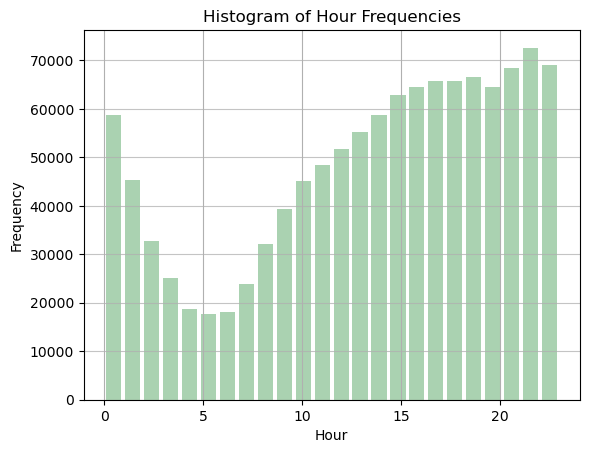

In [26]:
df_query['hour'].hist(bins=24, rwidth=0.8, color='#86bf91', alpha=0.7)
plt.title('Histogram of Hour Frequencies')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

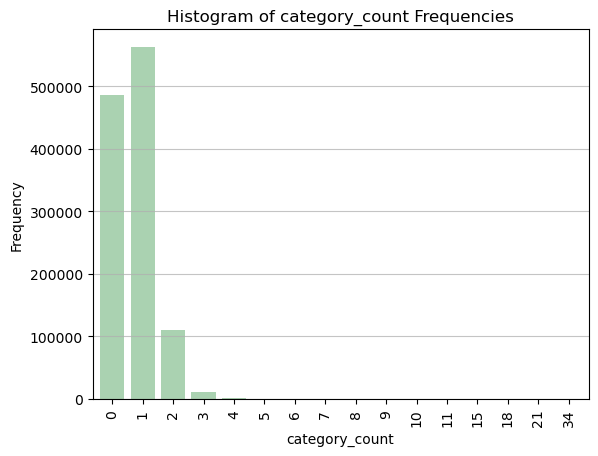

In [27]:
# Plotting the histogram using Pandas
ax = df_query['category_count'].value_counts().sort_index().plot(kind='bar', width=0.8, color='#86bf91', alpha=0.7)
ax.set_title('Histogram of category_count Frequencies')
ax.set_xlabel('category_count')
ax.set_ylabel('Frequency')
ax.grid(axis='y', alpha=0.75)

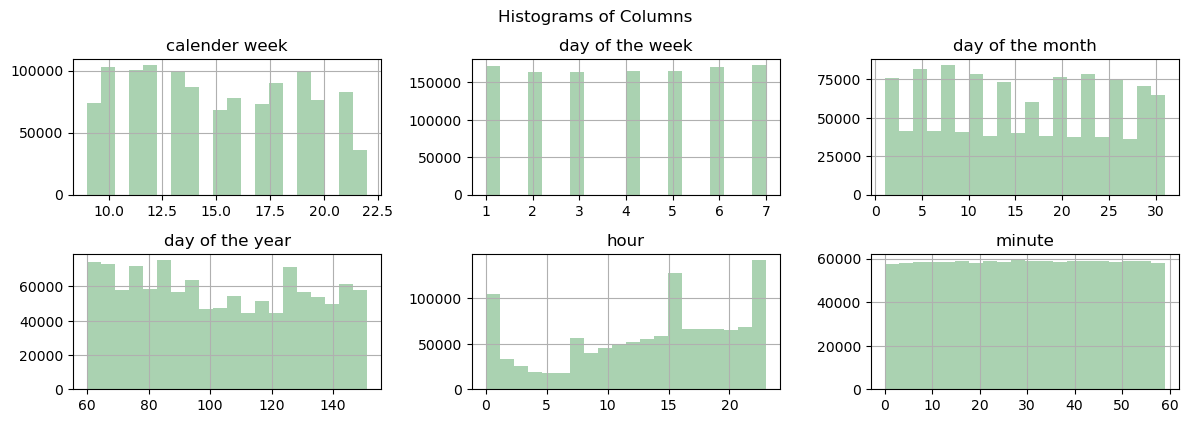

In [28]:
columns_to_plot = ["month", "calender week", "day of the week", "weekday", "day of the month", "day of the year", "hour", "minute"]

# Plotting histograms for each column
df_query[columns_to_plot].hist(bins=20, figsize=(12, 8), layout=(4, 3), color='#86bf91', alpha=0.7)
plt.suptitle('Histograms of Columns', x=0.5, y=0.98, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

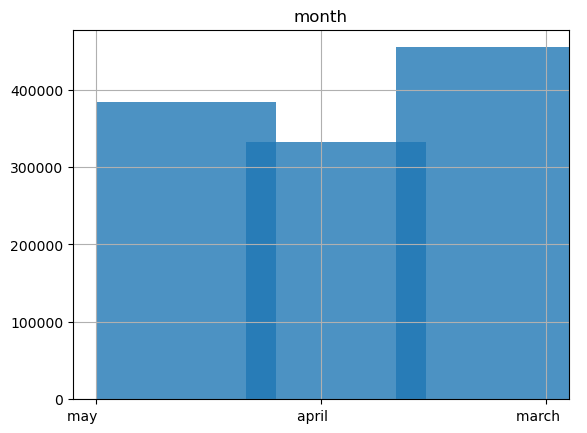

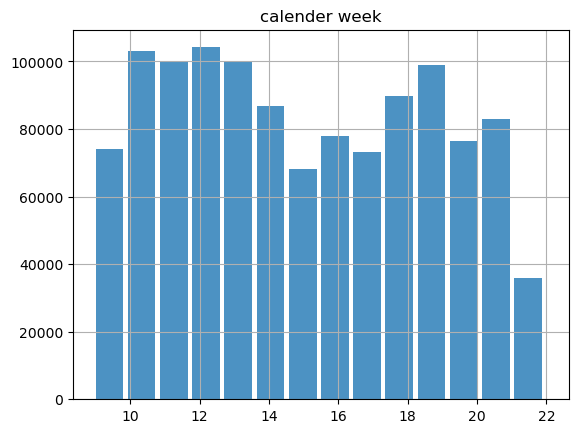

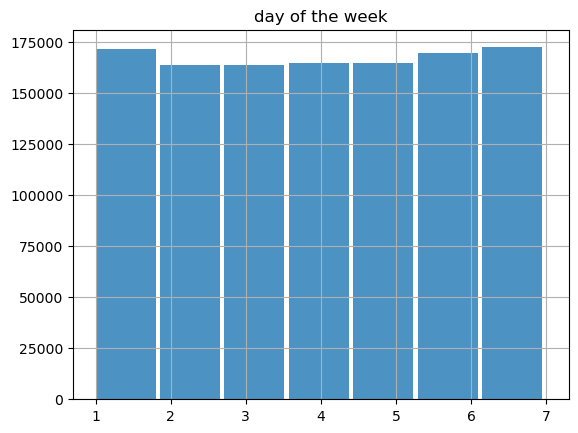

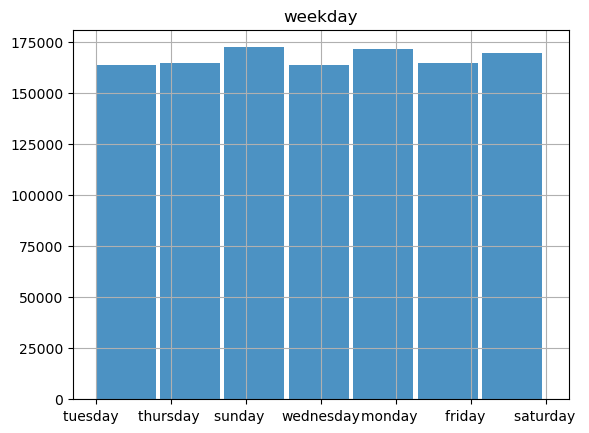

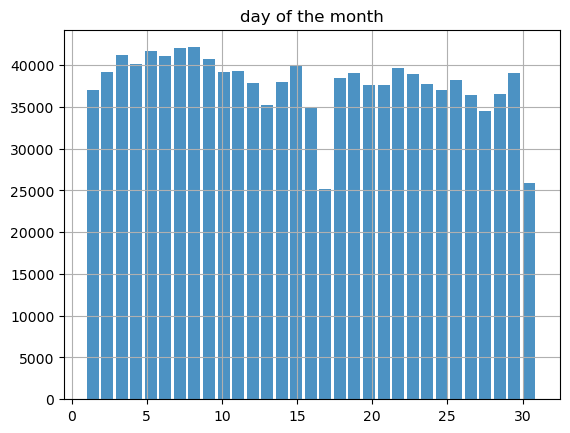

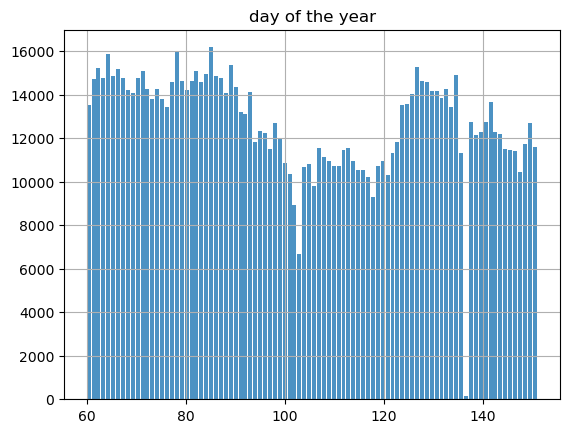

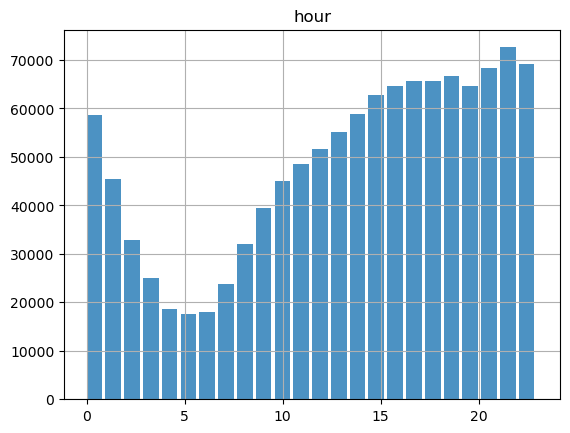

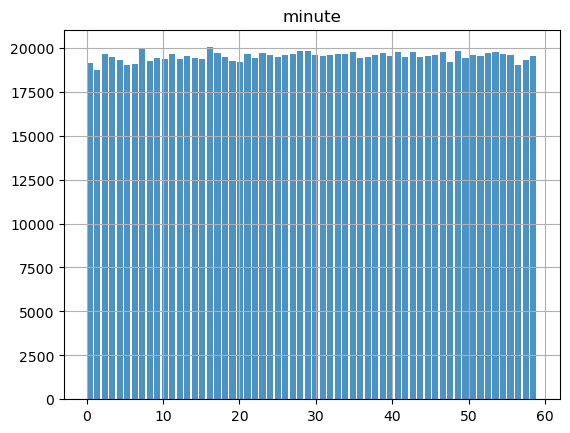

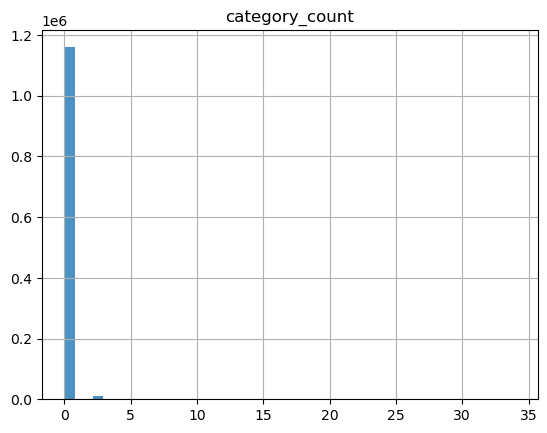

In [29]:
columns_to_plot = ["month", "calender week", "day of the week", "weekday", "day of the month", "day of the year", "hour", "minute", "category_count"]

# Plotting histograms for each column
for col in columns_to_plot:
    df_query[col].hist(bins=len(df_query[col].unique()), width=0.8, alpha=0.8)
    plt.title(col)
    plt.show()

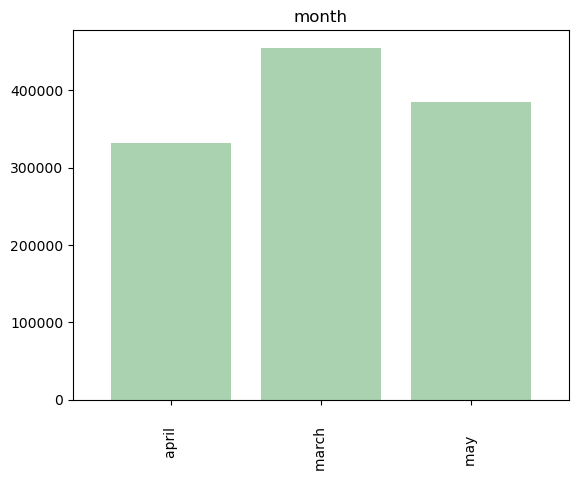

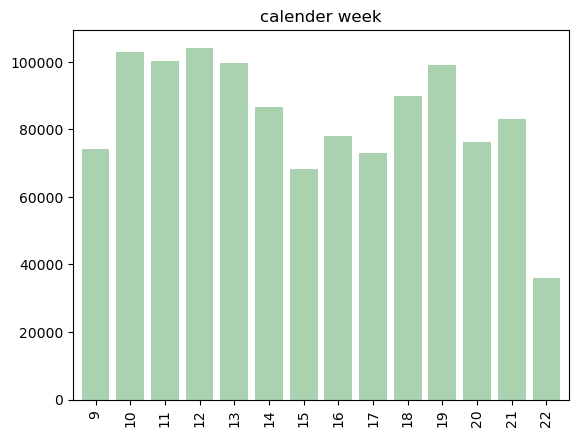

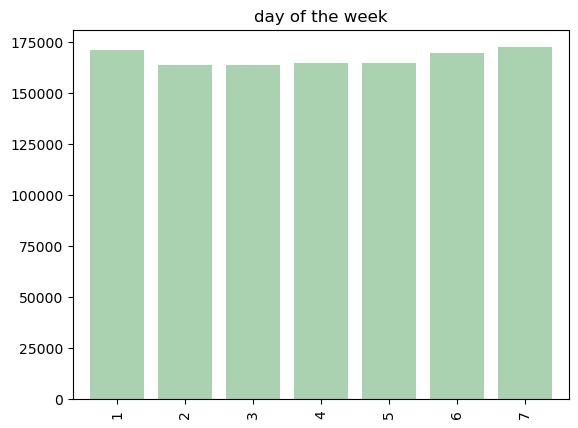

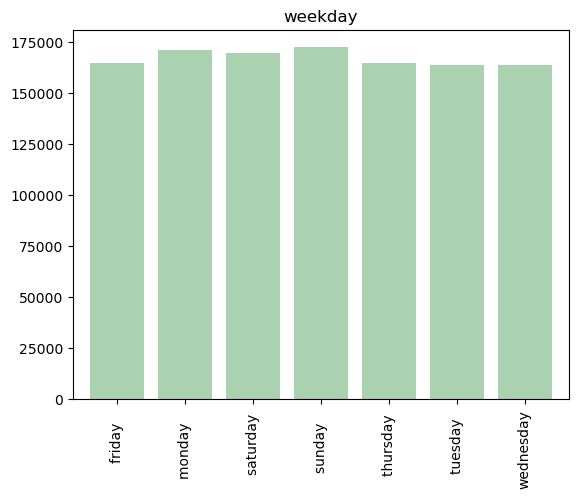

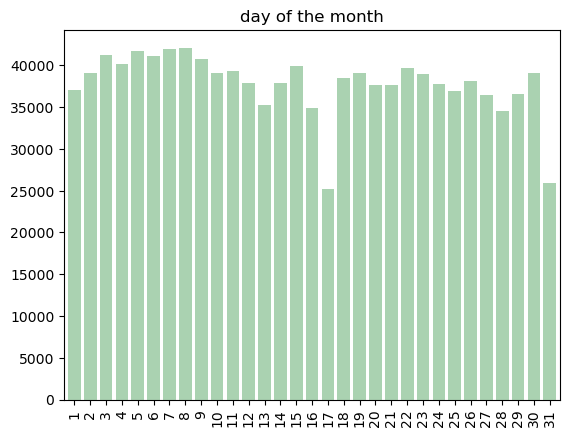

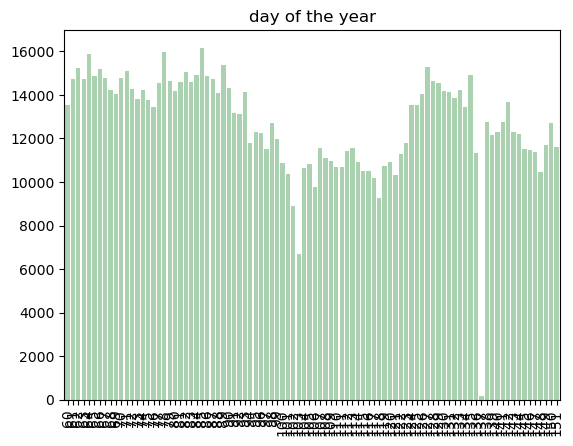

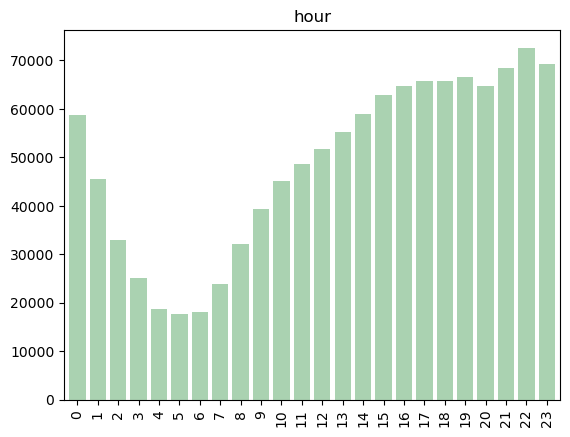

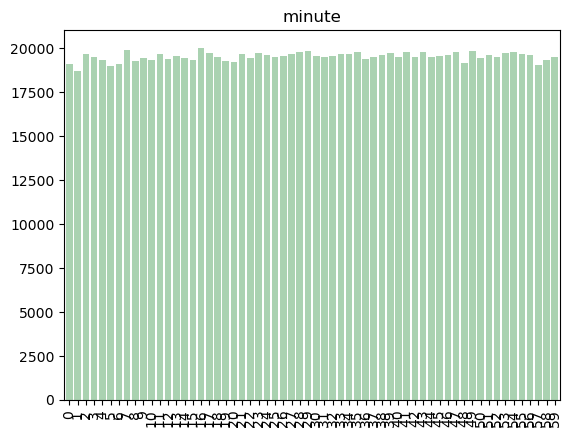

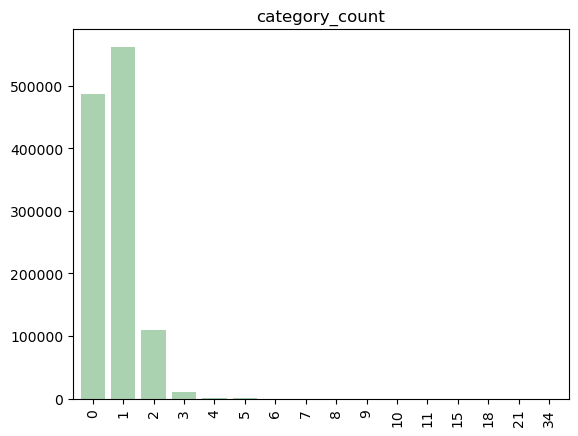

In [31]:
columns_to_plot = ["month", "calender week", "day of the week", "weekday", "day of the month", "day of the year", "hour", "minute", "category_count"]

# Plotting histograms for each column
for col in columns_to_plot:
    df_query[col].value_counts().sort_index().plot(kind='bar', width=0.8, color='#86bf91', alpha=0.7)
    plt.title(col)
    plt.show()

# Generate more queries with words of a list or df
### used to make query for the data_set_csv here "df_query"

In [5]:
def generate_search_query(keywords):
    # Initial part of the query
    query = "SELECT DISTINCT query.QUERY, timedim.*, facts.*\n"
    query += "FROM AOL_SCHEMA.FACTS facts\n"
    query += "INNER JOIN AOL_SCHEMA.QUERYDIM query ON facts.QUERYID = query.ID\n"
    query += "INNER JOIN AOL_SCHEMA.TIMEDIM timedim ON facts.TIMEID = timedim.ID\n"
    query += "WHERE "

    # Adding conditions for each keyword
    conditions = []
    for keyword in keywords:
        conditions.append(f"LOWER(query.QUERY) LIKE '%{keyword}%'\n   ")

    # Combining conditions with 'OR'
    query += " OR ".join(conditions)

    return query

In [6]:
# Example usage: I used this query for the df_query          !!! babe, teen and tits is in category !!!
search_keywords = list(df_search_words["search_words"])
sql_query = generate_search_query(search_keywords)
print(sql_query)

SELECT DISTINCT query.QUERY, timedim.*, facts.*
FROM AOL_SCHEMA.FACTS facts
INNER JOIN AOL_SCHEMA.QUERYDIM query ON facts.QUERYID = query.ID
INNER JOIN AOL_SCHEMA.TIMEDIM timedim ON facts.TIMEID = timedim.ID
WHERE LOWER(query.QUERY) LIKE '%xxx%'
    OR LOWER(query.QUERY) LIKE '%porn%'
    OR LOWER(query.QUERY) LIKE '%sex%'
    OR LOWER(query.QUERY) LIKE '%fuck%'
    OR LOWER(query.QUERY) LIKE '%girl%'
    OR LOWER(query.QUERY) LIKE '%babe%'
    OR LOWER(query.QUERY) LIKE '%teen%'
    OR LOWER(query.QUERY) LIKE '%cum%'
    OR LOWER(query.QUERY) LIKE '%adult%'
    OR LOWER(query.QUERY) LIKE '%18%'
    OR LOWER(query.QUERY) LIKE '%penis%'
    OR LOWER(query.QUERY) LIKE '%tits%'
    OR LOWER(query.QUERY) LIKE '%nude%'
    OR LOWER(query.QUERY) LIKE '%naked%'
    OR LOWER(query.QUERY) LIKE '%hot %'
   


In [25]:
# Example usage:
search_keywords = list(df_categ["words"])
sql_query = generate_search_query(search_keywords)
print(sql_query)

SELECT DISTINCT query.QUERY, timedim.*, facts.*
FROM AOL_SCHEMA.FACTS facts
INNER JOIN AOL_SCHEMA.QUERYDIM query ON facts.QUERYID = query.ID
INNER JOIN AOL_SCHEMA.TIMEDIM timedim ON facts.TIMEID = timedim.ID
WHERE LOWER(query.QUERY) LIKE '%amateur%'
    OR LOWER(query.QUERY) LIKE '%3D%'
    OR LOWER(query.QUERY) LIKE '%4K%'
    OR LOWER(query.QUERY) LIKE '%amateur%'
    OR LOWER(query.QUERY) LIKE '%anal%'
    OR LOWER(query.QUERY) LIKE '%arab%'
    OR LOWER(query.QUERY) LIKE '%asian%'
    OR LOWER(query.QUERY) LIKE '%ass%'
    OR LOWER(query.QUERY) LIKE '%asslick%'
    OR LOWER(query.QUERY) LIKE '%babe%'
    OR LOWER(query.QUERY) LIKE '%babysitter%'
    OR LOWER(query.QUERY) LIKE '%bbc%'
    OR LOWER(query.QUERY) LIKE '%bbw%'
    OR LOWER(query.QUERY) LIKE '%bdsm%'
    OR LOWER(query.QUERY) LIKE '%beach fuck%'
    OR LOWER(query.QUERY) LIKE '%bisexual%'
    OR LOWER(query.QUERY) LIKE '%big ass%'
    OR LOWER(query.QUERY) LIKE '%big black cock%'
    OR LOWER(query.QUERY) LIKE '%big dick